## Load Libraries

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import os # Operating System cho phép tương tác với hệ điều hành của máy tính
filename = input('Please key in the filename: ')
df = pd.read_csv(filename)
df

## Task 1: Import package and Load data

In [99]:
# Tạo path đối với các tệp tin
path ='/Users/vanhao/Documents/HaoCoding/Auttomatic_Anual_Sale_Report/Sales_Reporting_2019 /'
df = pd.read_csv(path + 'sales2019_1.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## Task 2: Clean and Preprocess Data

### Task 2.1: Merge 12-Month Data

In [100]:
filepaths = []
frames = []
for file in os.listdir(path):
    if file.endswith('csv'): # Chỉ lấy ra những file có đuôi .csv
        filepath = path + file # Tạo path cho từng tập tin
        df1 = pd.read_csv(filepath) # Tạo dataframe cho từng tập tin
        frames.append(df1) # Thêm dataframe vào danh sách frames
        file_merged = pd.concat(frames) # Truyền dsach frames vào concat

df = file_merged
df.to_csv('AnnualSales2019', index = False) 
# Lưu file thành 1 file csv (index=False để loại bỏ cột đầu tiên không cần thiết)

### Task 2.2: Add 'Month' Column

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 12010
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


** Note

* Quantity Ordered sai định dạng dữ liêu (int)
* Price Each đang sai định dạng dữ liệu (int)
* Order Date cũng sai định dạng dữ liệu Date

In [102]:
df['Month'] = df['Order Date'].str.slice(start=0, stop=2, step=1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [103]:
df['Month'].unique()

array(['03', '04', 'Or', nan, '02', '01', '05', '06', '12', '10', '11',
       '07', '08', '09'], dtype=object)

** Note

* Có chứa giá trị NaN và các giá trị không hợp lý như 'Or'

### Task 2.3: Get rid of 'NaN' and 'Or' Values

In [104]:
# Bỏ đi các row mà Month có chứa giá trị NaN
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [105]:
# Xử lý các hàng có Month mang giá trị 'Or'

df[df['Month'] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
433,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
864,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
930,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1979,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2032,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
9605,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10217,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10338,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


** Note

* Nhận thấy các hàng mang giá trị 'Or' thực chất được cắt ra từ Order Date => Loại bỏ

In [106]:
# Cập nhật dataframe hiện tại thành các hàng chỉ chứa các giá trị khác !='Or'
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


## Task 3: Reporting

### Task 3.1: Tháng nào có doanh số tốt nhất? Doanh số tháng đó là bao nhiêu

In [107]:
# Chuyển đổi lại dữ liệu cột Quantity Ordered và Price Each
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')

In [108]:
# Kiểm tra lại định dạng dữ liệu 
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [109]:
# Tạo cột Sales = Quantity Ordered * Price Each
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.000000
1,162009,Lightning Charging Cable,1,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.950000
2,162009,Wired Headphones,2,11.990000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.980000
3,162010,Bose SoundSport Headphones,1,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.989998
4,162011,34in Ultrawide Monitor,1,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.989990


In [110]:
# Di chuyển Cột Sales lên trước cột Order Date
moving_column = df.pop('Sales') # Sử dụng pop để cắt ra khỏi dataframe
# Insert để chèn vào dataframe (4: là vị trí, Sales: là tên cột, Giá trị ở đây là biến moving_column)
df.insert(4,'Sales',moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [111]:
# Tính Sale theo từng tháng
sales_values = df.groupby('Month').sum()['Sales']
sales_values

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

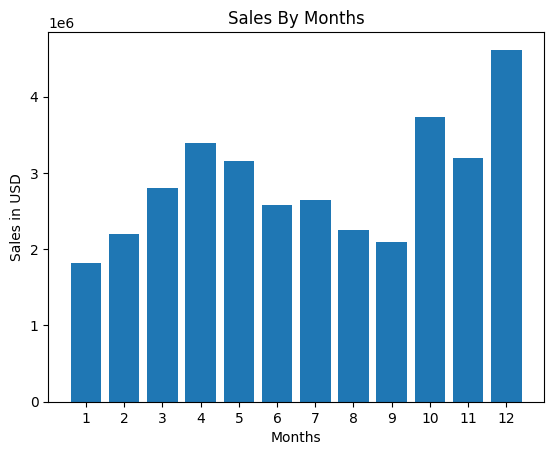

In [112]:
months = range(1,13)
plt.bar(x=months, height=sales_values)
plt.xticks(months) # Xticks để set label cho trục X
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.title('Sales By Months')
plt.show()

### Task 3.2: Thành phố nào có doanh số cao nhất

In [113]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [114]:
# Tạo cột City cắt từ Purchase Address

# Xây dựng hàm để tách City
def CutCity(address):
    return address.split(',')[1]

In [115]:
# Dungf phương thức Apply vào cột df['Purchase Address']
df['City'] = df['Purchase Address'].apply(CutCity)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [116]:
# Tính Sale theo từng tháng
sales_values_city = df.groupby('City').sum()['Sales']
sales_values_city

City
Atlanta          2795498.50
Austin           1819581.75
Boston           3661642.00
Dallas           2767975.50
Los Angeles      5452571.00
New York City    4664317.50
Portland         2320490.50
San Francisco    8262204.00
Seattle          2747755.50
Name: Sales, dtype: float32

In [117]:
# Loop qua Series để chắc chắn rằng City và giá trị Sales_Values khớp nhau
cities = []
for city, sales in sales_values_city.items():
    cities.append(city)
print(cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


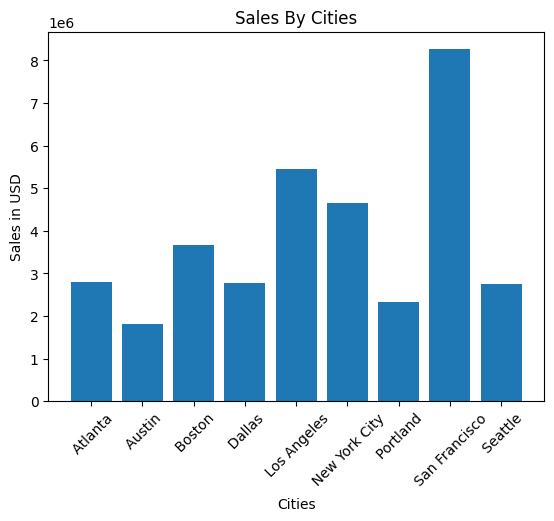

In [118]:
plt.bar(x=cities, height=sales_values_city)
plt.xticks(cities, rotation = 45) # Xticks để set label cho trục X
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.title('Sales By Cities')
plt.show()

### Tank 3.3: Doanh nghiệp cần chiếu quảng cáo vào thời gian nào để tăng khả năng mua hàng của Khách Hàng


In [119]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [120]:
# Chuyển đổi dữ liệu cột Order Date về đúng định dạng 
df['Order Date'] = pd.to_datetime(df['Order Date'])

/var/folders/4z/gtqzvj2n0r97wqplctd2fw900000gn/T/ipykernel_20059/3604003020.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [121]:
# Kiểm tra lại
print(df['Order Date'].dtypes)

datetime64[ns]


In [122]:
# Trích xuất giờ
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


In [123]:
# Kiểm tra lại định dạng dữ liệu
print(df['Sales'].dtypes)
print(df['Hour'].dtypes)

float32
int32


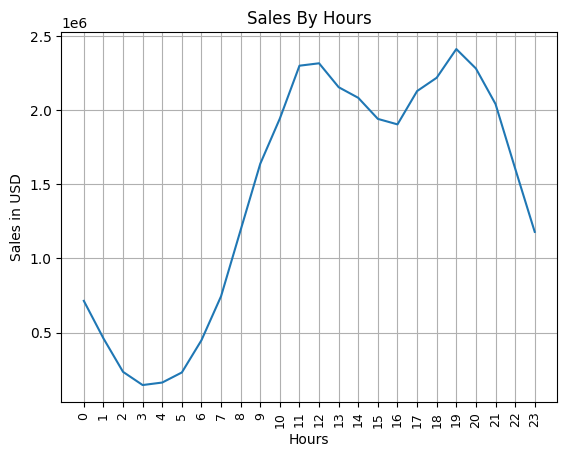

In [134]:
# Xây dựng hàm và trực quan Sale by hour

# Tính giá trị Sales theo Hour
sales_values_hour = df.groupby('Hour').sum(numeric_only=True)['Sales']
sales_values_hour

# Xây dựng hàm loop qua từng giá trị trong series 'sales_values_hour' để chắc chắn Sales và Hours khớp nhau
hours = []
for hour, sales in sales_values_hour.items():
    hours.append(hour)

# Trực quan hoá bằng line chart để thể hiện sự liên tục
plt.plot(hours, sales_values_hour)
plt.grid()
plt.xticks(hours, rotation = 90, size = 9) # Xticks để set label cho trục X
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.title('Sales By Hours')
plt.show()


### Tank 3.4:  Những mặt hàng nào thường được bán cùng nhau?


 Tìm những Order Id bị lặp lại (duplicated values) -- Tức là các sản phẩm được mua cùng đơn hàng đó

 Sau đó các sản phẩm cùng Order ID sẽ group các Product lại chung 1 hàng 

In [135]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


In [139]:
# Tìm các gái trị Duplicated

df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2


In [142]:
# Xây dựng hàng join Product
def joinproduct(product):
    return ', '.join(product)

In [143]:
# Group các Product cùng một Order ID thành 1 hàng
df_dup['Together_Products'] = df_dup.groupby('Order ID')['Product'].transform(joinproduct) 
# Phương thức apply chỉ nhận vào 1 function và giá trị trả về là 1 dataframe --> chuyển sang dùng transform giá trị trả về sẽ là 1 series
df_dup.head()

/var/folders/4z/gtqzvj2n0r97wqplctd2fw900000gn/T/ipykernel_20059/3266400199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Together_Products'] = df_dup.groupby('Order ID')['Product'].transform(joinproduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Together_Products
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone, Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone, Lightning Charging Cable"


In [146]:
# Drop các cột bị trùng lặp
df_dup = df_dup[['Order ID', 'Together_Products']].drop_duplicates()

In [145]:
df_dup.head()

,Order ID,Together_Products
0,162009,"iPhone, Lightning Charging Cable, Wired Headph..."
30,162037,"iPhone, Lightning Charging Cable"
60,162066,"AA Batteries (4-pack), USB-C Charging Cable"
66,162071,"Vareebadd Phone, USB-C Charging Cable"
78,162082,"Vareebadd Phone, Wired Headphones"


In [148]:
# Đếm 10 cặp sản phẩm được mua cùng nhau nhiều nhất
df_dup['Together_Products'].value_counts().head(10)

Together_Products
iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: count, dtype: int64

### Task 3.5: Sản phẩm nào được bán nhiều nhất? Tại sao?

In [149]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


/var/folders/4z/gtqzvj2n0r97wqplctd2fw900000gn/T/ipykernel_20059/1072386176.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


Text(0, 0.5, 'Price Each')

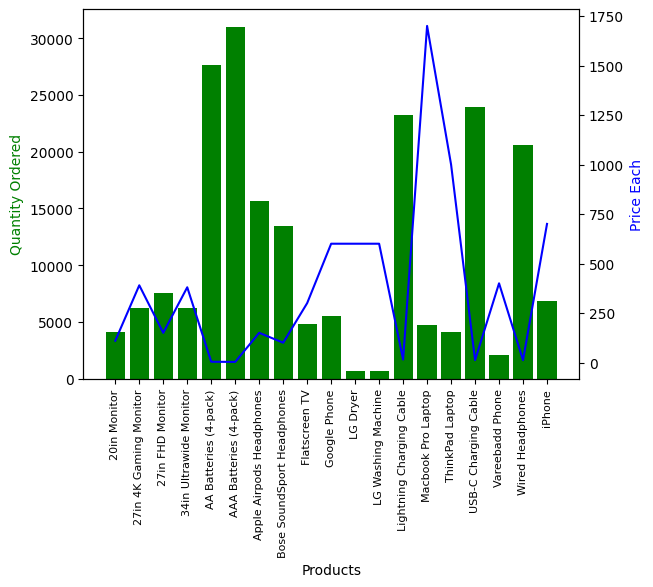

In [153]:
# Tính số lượng sản phẩm bán ra theo từng product
all_products = df.groupby('Product').sum(numeric_only=True)['Quantity Ordered']
# Tính giá từng sản phẩm
prices = df.groupby('Product').mean(numeric_only=True)['Price Each']
products_ls = [product for product, quant in all_products.items()]

x = products_ls # Tên tất cả sản phẩm
y1 = all_products # Tổng số lượng sản phẩm bán ra của từng sp
y2 = prices # Giá 1 đơn vị của từng sản phẩm

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')